In [2]:
#lbbVIXAnalysis-8-2
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.options.display.float_format = "{:,.2f}".format
from pandas.plotting import scatter_matrix

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt

import seaborn as sns
sns.set_style('darkgrid')

#############  ALGO SECTION  #######################################
from sklearn.cluster import KMeans

### IMPORT TRAINING STEPS ###
#   split training and testing data
from sklearn.model_selection import train_test_split
#   using the pipeline
from sklearn.pipeline import make_pipeline
#   using standardization during cross validation scoring
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
#   using GridSearch Cross Validation and folding
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold


##The ALGOS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


### COMPUTE THE WINNING ALGO METRICS AND REPORTING ###
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score #best for classifier models
from sklearn.metrics import confusion_matrix #best for classifier models
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score #best for classifier models Area Under ROC Curve
from sklearn.metrics import adjusted_rand_score #adjust rand index for unsupervised classifications




import os
os.getcwd()

'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks'

In [3]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-cornerstoneproject\\Final')

## Re-evaluate the Yield Curve by clustering.

### Reduce yieldSpread analysis by performing clustering on features developed in last analysis on yield curve. 

From the previous analysis VIXAnalysis-8-1, we created the following    

Maturities categories  
SSTMean (short short term) = 1 month - 6 month average yields  
STMean (short term mean) = 1 year - 3 year average yields  
MTMean(medium term mean) = 5 year - 10 year average yields  
LTMean (long term mean) = 20 - 30 year average yields    

Signal categories  
sig01 = where front month yield is larger than the 2 or (if not available) 3 month yield  
sig02 = where the short short term average is greater than both the short term and medium term yield averages  
sig03 = where the long term yields are less than the 1 month yields  
sig04 = where the short term yield average is greater than the long term yield average    

Range category  
yieldSpread is the difference between the long term average yield and the short short term average yield. It is   
not the highest yield less the smallest yield on the curve  

In [4]:
df1 = pd.read_csv('yieldSignals.csv', index_col=0)

In [5]:
df1.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,yieldSpread,sig03,sig04
4252,2007-01-02,4.79,0.00,5.07,5.11,5.00,4.80,4.71,4.68,4.68,4.68,4.87,4.79,94.48,3.74,4.84,4.68,4.83,0,0,1.09,0,1
4253,2007-01-03,4.84,0.00,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77,95.84,3.75,4.81,4.66,4.81,0,0,1.06,1,0
4254,2007-01-04,4.80,0.00,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72,95.24,3.73,4.76,4.61,4.76,0,0,1.04,1,0
4255,2007-01-05,4.81,0.00,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74,95.25,3.74,4.81,4.65,4.79,0,0,1.05,1,1
4256,2007-01-08,4.87,0.00,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74,95.87,3.77,4.83,4.66,4.79,0,0,1.02,1,1


In [6]:
df1.tail()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,yieldSpread,sig03,sig04
7663,2020-08-17,0.09,0.10,0.10,0.12,0.13,0.14,0.18,0.29,0.49,0.69,1.19,1.43,90.00,0.10,0.15,0.49,1.31,0,0,1.21,0,0
7664,2020-08-18,0.08,0.09,0.09,0.13,0.13,0.14,0.17,0.27,0.47,0.67,1.16,1.40,88.89,0.10,0.15,0.47,1.28,0,0,1.18,0,0
7665,2020-08-19,0.07,0.09,0.11,0.12,0.13,0.14,0.17,0.29,0.48,0.68,1.20,1.42,77.78,0.10,0.15,0.48,1.31,0,0,1.21,0,0
7666,2020-08-20,0.08,0.09,0.11,0.13,0.12,0.13,0.15,0.26,0.46,0.65,1.15,1.38,88.89,0.10,0.13,0.46,1.26,0,0,1.16,0,0
7667,2020-08-21,0.07,0.09,0.10,0.12,0.13,0.16,0.16,0.27,0.46,0.64,1.13,1.35,77.78,0.10,0.15,0.46,1.24,0,0,1.15,0,0


In [7]:
df1.dtypes

Date            object
1 mo           float64
2 mo           float64
3 mo           float64
6 mo           float64
1 yr           float64
2 yr           float64
3 yr           float64
5 yr           float64
7 yr           float64
10 yr          float64
20 yr          float64
30 yr          float64
%one2Next      float64
SSTMean        float64
STMean         float64
MTMean         float64
LTMean         float64
sig01            int64
sig02            int64
yieldSpread    float64
sig03            int64
sig04            int64
dtype: object

In [8]:
df1.fillna(0, inplace=True)

In [9]:
df2 = df1.copy()

In [10]:
df1.sig01 = df2.sig01.astype(float)
df1.sig02 = df2.sig02.astype(float)
df1.sig03 = df2.sig03.astype(float)
df1.sig04 = df2.sig04.astype(float)

In [11]:
df2 = df2[['%one2Next','SSTMean','STMean','MTMean','LTMean','sig01',
           'sig02','sig03','sig04','yieldSpread']]

In [12]:
df2.describe()

,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread
count,"3,416.00","3,416.00","3,416.00","3,416.00","3,416.00","3,416.00","3,416.00","3,416.00","3,416.00","3,416.00"
mean,inf,0.73,1.27,2.30,3.28,0.26,0.05,0.03,0.01,2.55
std,nan,1.02,1.16,0.93,0.91,0.44,0.22,0.17,0.09,1.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.15
25%,66.67,0.06,0.45,1.66,2.70,0.00,0.00,0.00,0.00,1.78
50%,90.25,0.14,0.83,2.13,3.02,0.00,0.00,0.00,0.00,2.64
75%,100.00,1.29,1.74,2.83,4.12,1.00,0.00,0.00,0.00,3.42
max,inf,3.90,5.07,5.22,5.39,1.00,1.00,1.00,1.00,4.64


In [13]:
 ##iris.drop(iris.index[[1,3,5,7]])  to drop rows

In [14]:
def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df2.dropna(inplace=True)
    indices_to_keep = ~d2f.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64)

In [15]:
## to find any values kMeans says is inf
#df2.iloc[df2.values==np.inf]#then delete them..#df2.iloc[df2.values==np.nan]
#df2.iloc[df2.values== -np.inf]
df2.iloc[df2.values== np.nan]
#df2.drop(df2.index[[2205]], inplace=True)

,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread


In [16]:
#df2.drop(df2.index[1687])##this solution doesn't work either

In [17]:
df2.drop(df2.index[df2['%one2Next'] == np.inf], inplace = True)## this got rid of it sheesh

In [18]:
df2.head(2000)
#df.drop(df.index[[0]], inplace=True)
#df2.drop(df2.index[[2205]], inplace=True)
#df2.drop(df2.index[[2205]],inplace=True)


,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread
4252,94.48,3.74,4.84,4.68,4.83,0,0,0,1,1.09
4253,95.84,3.75,4.81,4.66,4.81,0,0,1,0,1.06
4254,95.24,3.73,4.76,4.61,4.76,0,0,1,0,1.04
4255,95.25,3.74,4.81,4.65,4.79,0,0,1,1,1.05
4256,95.87,3.77,4.83,4.66,4.79,0,0,1,1,1.02
4257,96.46,3.78,4.84,4.65,4.79,0,0,1,1,1.01
4258,97.05,3.79,4.85,4.68,4.82,0,0,1,1,1.03
4259,97.65,3.81,4.90,4.73,4.87,0,0,1,1,1.06
4260,97.84,3.81,4.92,4.76,4.91,0,0,1,1,1.10
4261,97.85,3.82,4.90,4.74,4.89,0,0,1,1,1.08


In [19]:
df2.dtypes


%one2Next      float64
SSTMean        float64
STMean         float64
MTMean         float64
LTMean         float64
sig01            int64
sig02            int64
sig03            int64
sig04            int64
yieldSpread    float64
dtype: object

In [20]:
df2.describe()

,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread
count,"3,414.00","3,414.00","3,414.00","3,414.00","3,414.00","3,414.00","3,414.00","3,414.00","3,414.00","3,414.00"
mean,83.90,0.73,1.27,2.30,3.28,0.26,0.05,0.03,0.01,2.55
std,38.11,1.02,1.16,0.93,0.91,0.44,0.22,0.17,0.09,1.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.15
25%,66.67,0.06,0.45,1.66,2.70,0.00,0.00,0.00,0.00,1.78
50%,90.22,0.14,0.83,2.13,3.02,0.00,0.00,0.00,0.00,2.64
75%,100.00,1.29,1.74,2.83,4.12,1.00,0.00,0.00,0.00,3.42
max,540.00,3.90,5.07,5.22,5.39,1.00,1.00,1.00,1.00,4.64


In [21]:
df1.loc[df1['%one2Next'] == 540]

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,yieldSpread,sig03,sig04
5949,2013-10-08,0.27,0.00,0.05,0.09,0.15,0.40,0.70,1.43,2.05,2.66,3.41,3.70,540.00,0.10,0.42,2.05,3.56,1.00,0.00,3.45,0.00,0.00


In [22]:
df2.head()

,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread
4252,94.48,3.74,4.84,4.68,4.83,0,0,0,1,1.09
4253,95.84,3.75,4.81,4.66,4.81,0,0,1,0,1.06
4254,95.24,3.73,4.76,4.61,4.76,0,0,1,0,1.04
4255,95.25,3.74,4.81,4.65,4.79,0,0,1,1,1.05
4256,95.87,3.77,4.83,4.66,4.79,0,0,1,1,1.02


In [23]:
df2.sig04.value_counts()

0    3386
1      28
Name: sig04, dtype: int64

In [24]:
k_means = make_pipeline(StandardScaler(), 
                       KMeans(n_clusters = 5, 
                             random_state = 123))

In [25]:
k_means.fit(df2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=123))])

In [26]:
df2['clusters'] = k_means.predict(df2)

In [27]:
df2.head(1000)

,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread,clusters
4252,94.48,3.74,4.84,4.68,4.83,0,0,0,1,1.09,3
4253,95.84,3.75,4.81,4.66,4.81,0,0,1,0,1.06,1
4254,95.24,3.73,4.76,4.61,4.76,0,0,1,0,1.04,1
4255,95.25,3.74,4.81,4.65,4.79,0,0,1,1,1.05,3
4256,95.87,3.77,4.83,4.66,4.79,0,0,1,1,1.02,3
4257,96.46,3.78,4.84,4.65,4.79,0,0,1,1,1.01,3
4258,97.05,3.79,4.85,4.68,4.82,0,0,1,1,1.03,3
4259,97.65,3.81,4.90,4.73,4.87,0,0,1,1,1.06,3
4260,97.84,3.81,4.92,4.76,4.91,0,0,1,1,1.10,3
4261,97.85,3.82,4.90,4.74,4.89,0,0,1,1,1.08,3


In [28]:
df2['clusters'].value_counts()

2    1967
1     635
0     616
4     168
3      28
Name: clusters, dtype: int64

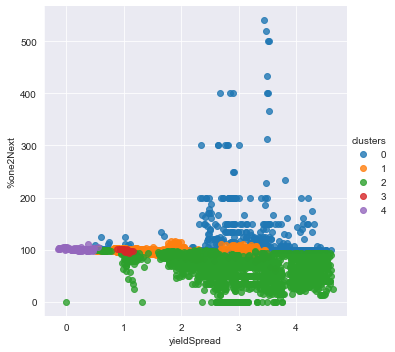

In [29]:
sns.lmplot(x='yieldSpread', y='%one2Next', hue='clusters', data=df2, fit_reg=False)

C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cinderella\anaconda3\lib\site-packages\seaborn\distribut

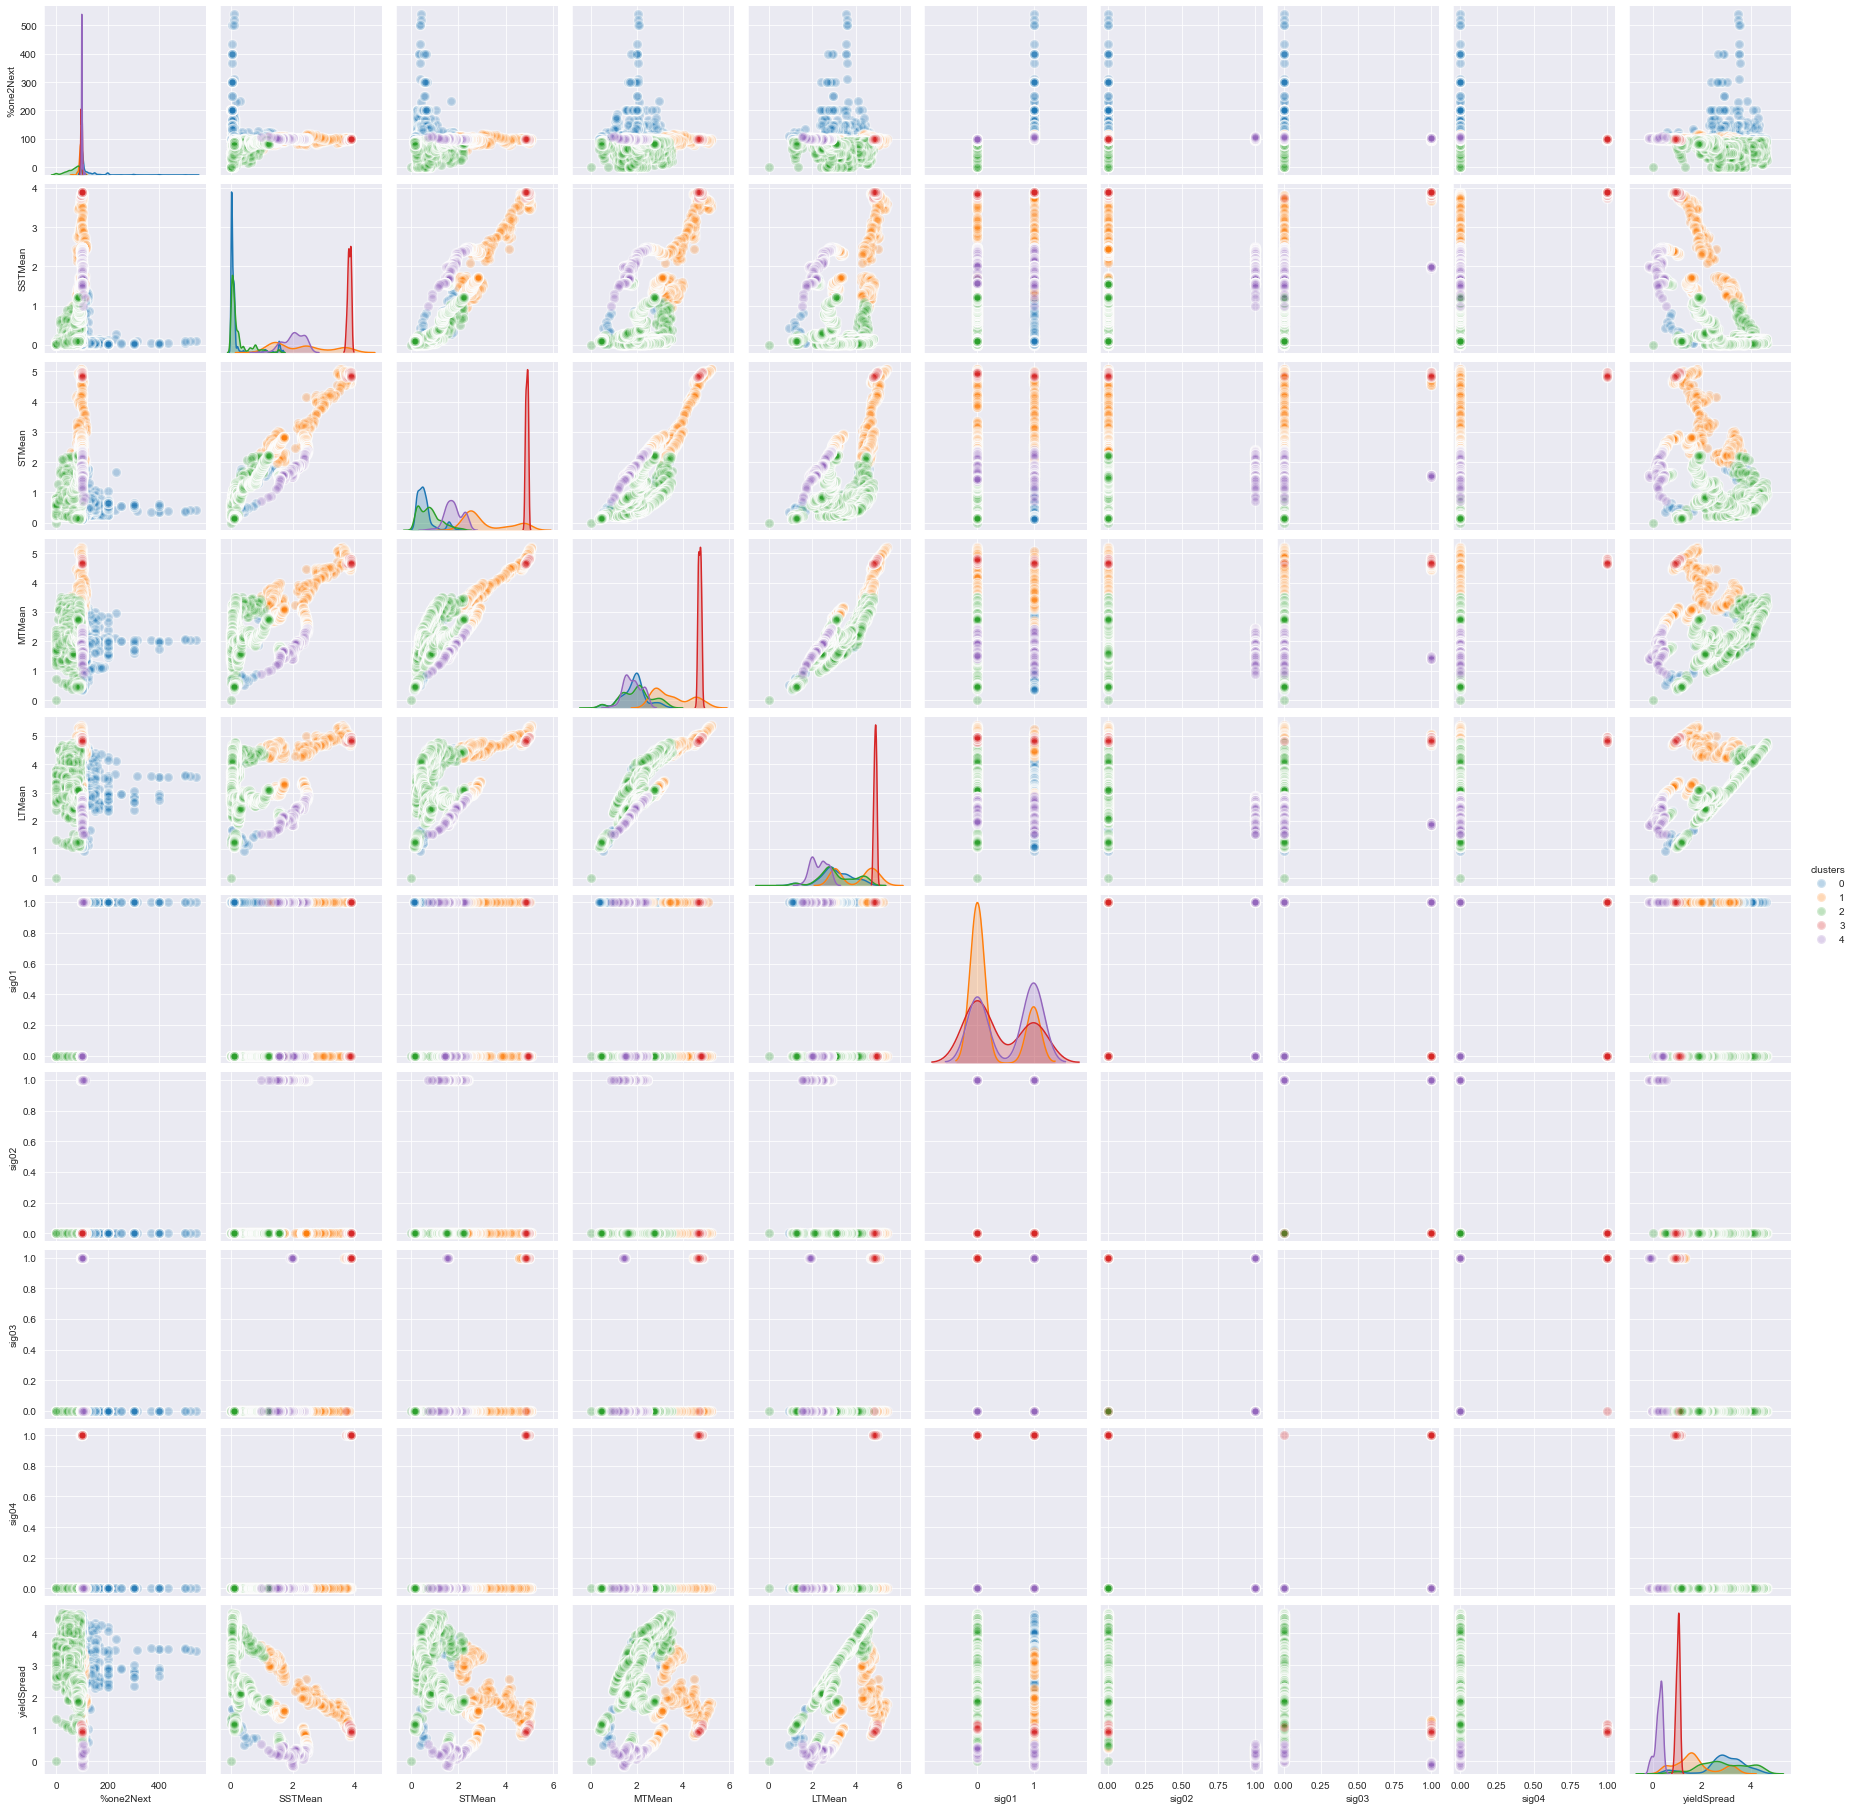

In [30]:
plt.figsize = (20,20)
sns.pairplot(df2, kind='scatter', hue="clusters",
              plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.3))

In [31]:
df2['Date'] = df1.Date.copy()

In [32]:
df2

,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread,clusters,Date
4252,94.48,3.74,4.84,4.68,4.83,0,0,0,1,1.09,3,2007-01-02
4253,95.84,3.75,4.81,4.66,4.81,0,0,1,0,1.06,1,2007-01-03
4254,95.24,3.73,4.76,4.61,4.76,0,0,1,0,1.04,1,2007-01-04
4255,95.25,3.74,4.81,4.65,4.79,0,0,1,1,1.05,3,2007-01-05
4256,95.87,3.77,4.83,4.66,4.79,0,0,1,1,1.02,3,2007-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
7663,90.00,0.10,0.15,0.49,1.31,0,0,0,0,1.21,2,2020-08-17
7664,88.89,0.10,0.15,0.47,1.28,0,0,0,0,1.18,2,2020-08-18
7665,77.78,0.10,0.15,0.48,1.31,0,0,0,0,1.21,2,2020-08-19
7666,88.89,0.10,0.13,0.46,1.26,0,0,0,0,1.16,2,2020-08-20


In [33]:
df1

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,yieldSpread,sig03,sig04
4252,2007-01-02,4.79,0.00,5.07,5.11,5.00,4.80,4.71,4.68,4.68,4.68,4.87,4.79,94.48,3.74,4.84,4.68,4.83,0.00,0.00,1.09,0.00,1.00
4253,2007-01-03,4.84,0.00,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77,95.84,3.75,4.81,4.66,4.81,0.00,0.00,1.06,1.00,0.00
4254,2007-01-04,4.80,0.00,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72,95.24,3.73,4.76,4.61,4.76,0.00,0.00,1.04,1.00,0.00
4255,2007-01-05,4.81,0.00,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74,95.25,3.74,4.81,4.65,4.79,0.00,0.00,1.05,1.00,1.00
4256,2007-01-08,4.87,0.00,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74,95.87,3.77,4.83,4.66,4.79,0.00,0.00,1.02,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,2020-08-17,0.09,0.10,0.10,0.12,0.13,0.14,0.18,0.29,0.49,0.69,1.19,1.43,90.00,0.10,0.15,0.49,1.31,0.00,0.00,1.21,0.00,0.00
7664,2020-08-18,0.08,0.09,0.09,0.13,0.13,0.14,0.17,0.27,0.47,0.67,1.16,1.40,88.89,0.10,0.15,0.47,1.28,0.00,0.00,1.18,0.00,0.00
7665,2020-08-19,0.07,0.09,0.11,0.12,0.13,0.14,0.17,0.29,0.48,0.68,1.20,1.42,77.78,0.10,0.15,0.48,1.31,0.00,0.00,1.21,0.00,0.00
7666,2020-08-20,0.08,0.09,0.11,0.13,0.12,0.13,0.15,0.26,0.46,0.65,1.15,1.38,88.89,0.10,0.13,0.46,1.26,0.00,0.00,1.16,0.00,0.00


In [34]:
# save as csv to import into main abt for the vix
df2.to_csv('yieldSignalsC.csv')

In [36]:
os.chdir('C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\')